# Starting Off:

Look at the graph below and determine why this is a bad visualization:

<img src="http://livingqlikview.com/wp-content/uploads/2017/04/Worst-Data-Visualizations-03.jpg" alt="viz" title="Bad Data Viz" width="550" />



**Learning Goals:** Students will be able to determine which graph to use when trying to convey specific information. 

**Agenda:**  
- Review the uses of each graph
- Review code to create each graph
    - Line Graph
    - Bar Chart
    - Box plot
    - Histogram
    - Scatter Plot
- Practice Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Line Graph

Line graphs are used to track changes over short and long periods of time. When smaller changes exist, line graphs are better to use than bar graphs. 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
### Create a fake data set
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng


In [10]:
data = rng + rnd

In [11]:
data[0]

array([ 5,  7,  6, 11,  9,  5, 12, 14, 10, 18, 16, 11, 16, 21, 18, 22, 20,
       21, 21, 28, 28, 25, 30, 25, 29, 30, 34, 32, 30, 32, 30, 31, 36, 39,
       39, 39, 38, 38, 40, 42, 49, 41, 44, 50, 52, 50, 55, 48, 53, 54])

In [12]:
yrs

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999])

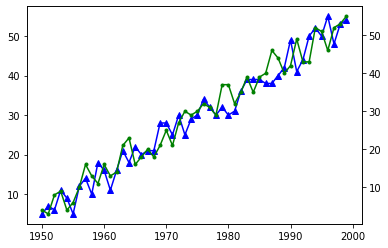

In [13]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot( yrs, data[0],color='b', marker ='^')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot( yrs, data[1],color='g', marker ='.')

plt.show()

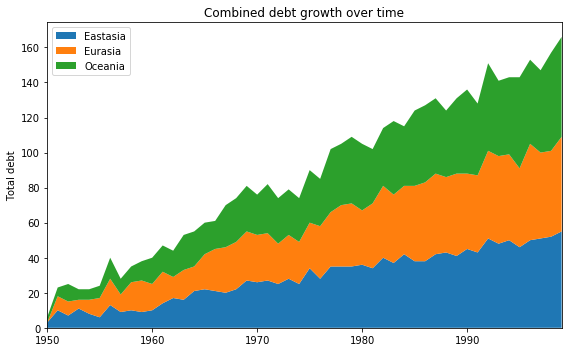

In [22]:
# generate a fig and ax object 
fig, ax = plt.subplots(figsize=(8, 5))

#use the stackplot method to create your graph
ax.stackplot(yrs, data, labels=['Eastasia', 'Eurasia', 'Oceania'])

#add additional information to your graph
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(left=yrs[0], right=yrs[-1])
fig.tight_layout()
fig.

## Bar Chart

Bar graphs are used to compare variables between different groups/categories. Sometimes they are used to measure change over time, but that is often when you think of a time period as a group, like decades, and changes between those groups are quite large.  

In [16]:
import pandas as pd

data = pd.read_csv('weight-height.csv', index_col=False)

In [17]:
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']


In [18]:
females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


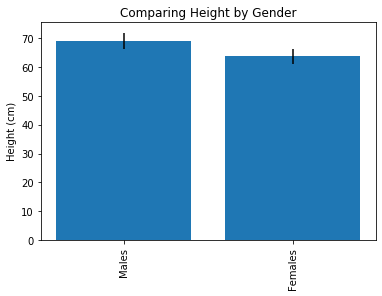

In [26]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Males', 'Females'], [males['Height'].mean(), females['Height'].mean()], yerr= [males['Height'].std(), females['Height'].std(),])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(['Males', 'Females'], rotation=90)

# Set the y-axis label
ax.set_ylabel("Height (cm)")

ax.set_title('Comparing Height by Gender')

plt.show()

## Box Plot

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

<img src="https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/img/5214889_01-eng.gif" alt="boxplot" title="Box Plot" width="550" />





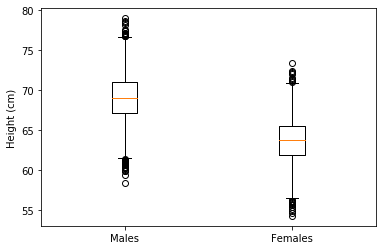

In [27]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([males['Height'], females['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Males', "Females"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

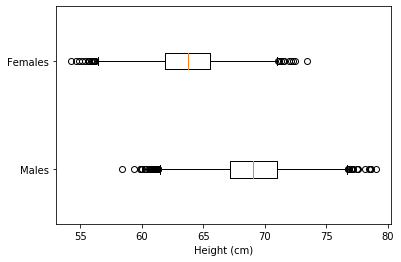

In [28]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([males['Height'], females['Height']], vert=False)

# Add x-axis tick labels:
ax.set_yticklabels(['Males', "Females"])

# Add a y-axis label
ax.set_xlabel("Height (cm)")

plt.show()

## Histogram

A histogram is a plot that lets you discover the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. The height of each bar shows the quantity in each range.

(Similar to a Bar Graph, **but in a Histogram each bar is for a range of data.**)

<img src="https://statistics.laerd.com/statistical-guides/img/histogram-1.png" alt="viz" title="Histogram" width="350" />

**How do you construct a histogram from a continuous variable?**

To construct a histogram from a continuous variable you first need to split the data into intervals, called bins. In the example above, age has been split into bins, with each bin representing a 10-year period starting at 20 years. Each bin contains the number of occurrences of scores in the data set that are contained within that bin. For the above data set, the frequencies in each bin have been tabulated along with the scores that contributed to the frequency in each bin (see below):

<img src="binned.png" alt="viz" title="Histogram" width="550" />

**Choosing the correct bin width**  

There is no right or wrong answer for how wide we should define our bin size, but there are rules of thumb. You need to make sure that the bins are not too small or too large. Consider the histogram we produced earlier (see above): the following histograms use the same data, but have either much smaller or larger bins, as shown below:


<img src="https://statistics.laerd.com/statistical-guides/img/histogram-4.png" alt="viz" title="Histogram" width="550" />


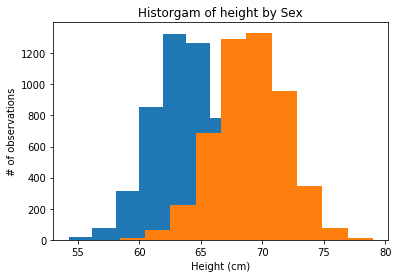

In [19]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(females['Height'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(males['Height'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Height (cm)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

ax.set_title('Historgam of height by Sex')

plt.show()

### Adding parameters to make data more clear

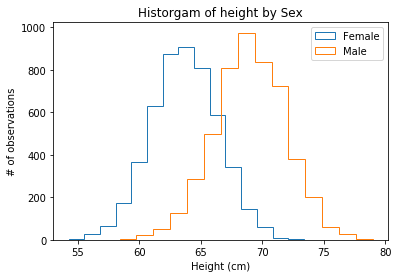

In [20]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(females['Height'], label="Female", bins=15, histtype='step')

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(males['Height'], label="Male", bins=15, histtype='step')

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Height (cm)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

ax.set_title('Historgam of height by Sex')

ax.legend()
plt.show()



### What is the difference between a bar chart and a histogram?

The major difference is that a histogram is only used to plot the frequency of score occurrences in a continuous data set that has been divided into classes, called bins. On the other hand, bar charts can be used for a great deal of other types of variables including ordinal and nominal data sets.

## Scatterplot

Scatterplots, also referred to as an 'X-Y plot', are used to show/determine relationships between the two different variables. It compares the values of different variables across observations. 

The x-axis is used to measure one event (or variable) and the y-axis is used to measure the other. If both variables increase at the same time, they have a positive relationship. If one variable decreases while the other increases, they have a negative relationship. Sometimes the variables don't follow any pattern and have no relationship.

<img src="https://seaborn.pydata.org/_images/seaborn-scatterplot-2.png" alt="viz" title="Histogram" width="550" />

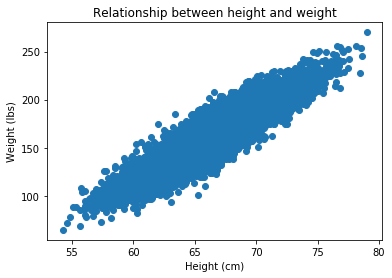

In [22]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(data["Height"], data["Weight"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("Height (cm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Weight (lbs)")

ax.set_title('Relationship between height and weight')


plt.show()

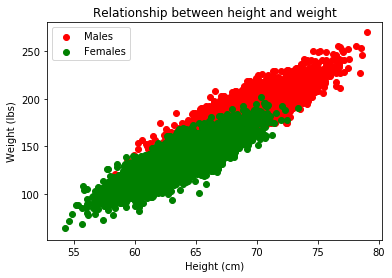

In [26]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(males["Height"], males["Weight"],label='Males', color ='r' )

ax.scatter(females["Height"], females["Weight"], label='Females',color ='g' )

# Set the x-axis label to "Height (cm)"
ax.set_xlabel("Height (cm)")

# Set the y-axis label to "Weight (lbs)"
ax.set_ylabel("Weight (lbs)")

ax.set_title('Relationship between height and weight')

ax.legend()
plt.show()

In [27]:
data['Gen_color'] = np.where(data['Gender']=='Female', 1, 0)

In [28]:
data.head()

,Gender,Height,Weight,Gen_color
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0


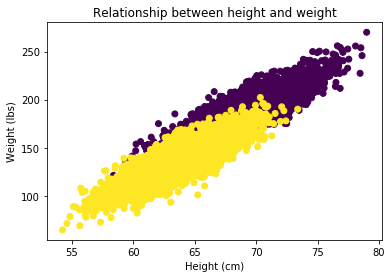

In [35]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(data["Height"], data["Weight"], c=data.Gen_color)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("Height (cm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Weight (lbs)")

ax.set_title('Relationship between height and weight')


plt.show()


You have a data table with the height and weight for members of both a high school basketball team and a football team. You also have their win totals for each year in another table.  You want to create different graphics to convey information about the two team. Read each prompt below and determine which type of graph would be most appropriate:  



1. Compare the average height of the football players with the average height of the basketball players.

2. See if there is a relationship between the height and weight of the players.

3. Understand the distribution of the heights of both teams.  

4. Show if there are any outliers of extremely short or tall players. 

5. Get a sense of how the basketball team has performed throughout the history of the program.  

In [35]:
import seaborn as sns
sns.set()

data.head()
data

,Gender,Height,Weight,Gen_color
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0
...,...,...,...,...
9995,Female,66.172652,136.777454,1
9996,Female,67.067155,170.867906,1
9997,Female,63.867992,128.475319,1
9998,Female,69.034243,163.852461,1


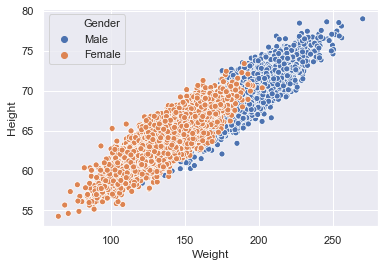

In [33]:
sns.scatterplot(data['Weight'],data['Height'],hue = data['Gender'])